# in The name of God

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

from numpy import linalg as LA

In [2]:
d = pandas.read_excel('data.xlsx')

In [3]:
X = d.iloc[:,1]
Y = d.iloc[:,2]

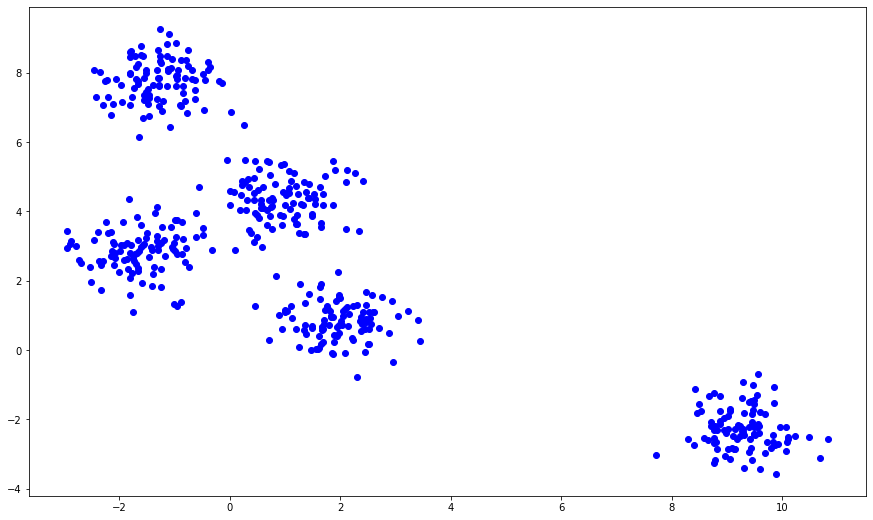

In [4]:
plt.figure(figsize=(15,9))
plt.scatter(X, Y, c ="blue")
plt.show()

Well, it seems like best distance we could work with is Euclidean(L2 norm)

we need to define each point as an object separatly, then doing the job of measures 

In [5]:
#the Algorithm
    #Defining parameters
Nclus = 5                                                    #Number of clusters
Nvar = 2                                                     #Number of variables
a11 = -4; a12 = 12; a21 = -4; a22 = 10;
################################################################################
means = np.random.random((5,2))                              #means Genesis
means = means@np.diag([a12-a11,a22-a21])

In [22]:
z = np.repeat(np.array([[1, 2]]), 5, 0)
z

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [19]:
z

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4]])

In [69]:
means

array([[ 0.63917087, 10.47531265],
       [13.24997175,  9.82195538],
       [ 0.63826507,  7.97984707],
       [ 8.82341971, 11.97428602],
       [ 5.24459605, 10.80715216]])

In [12]:
points = d.iloc[:,1:3]

In [16]:
LA.norm(points, ord = 2, axis = 1, keepdims=True)

array([[ 2.44166559],
       [ 4.34641737],
       [ 5.52113932],
       [ 3.57420737],
       [ 3.46918815],
       [ 9.45123079],
       [ 4.25099103],
       [ 9.22671127],
       [ 2.08710201],
       [ 2.17636307],
       [ 8.09039661],
       [ 3.5795949 ],
       [ 4.12933317],
       [ 8.41114275],
       [ 2.65331903],
       [ 9.12118803],
       [ 2.66729274],
       [ 9.9082632 ],
       [ 3.8445506 ],
       [ 2.90301627],
       [ 1.93113892],
       [10.18495599],
       [ 1.6386963 ],
       [ 3.32586842],
       [ 1.59716446],
       [ 8.22307214],
       [ 1.67915495],
       [ 2.7498832 ],
       [ 7.41370814],
       [ 3.49177586],
       [ 2.13682631],
       [ 4.85220659],
       [ 3.9213269 ],
       [ 8.63779152],
       [ 4.0311635 ],
       [ 2.18354246],
       [ 2.13310063],
       [10.08245225],
       [ 9.83603617],
       [ 9.11788593],
       [ 8.75346337],
       [ 9.52706071],
       [ 3.17450097],
       [ 1.59591269],
       [ 4.97373191],
       [ 3

In [17]:
a = points - points

In [43]:
mean = np.array([[1, 2],[1, 2]])

In [44]:
mean = np.repeat(mean, 250, 0)

In [45]:
mean

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1,

In [46]:
s = points-mean

In [47]:
s

,X,Y
0,1.441256,-2.044710
1,-0.686360,2.335086
2,0.895938,3.185403
3,-2.521727,1.234085
4,-0.652862,1.451777
...,...,...
495,8.891518,-5.559564
496,-1.047492,3.474253
497,-3.697986,0.521947
498,-2.859490,0.635500


In [57]:
a

array([[0.2124964 , 0.44712652],
       [0.36511528, 0.683945  ],
       [0.58427502, 0.70886917],
       [0.48932441, 0.81594453],
       [0.90686685, 0.16265532]])